**THIS IS AN ALGORITHM FOR BRAIN TUMOR PREDICTION **
<br>
We first mount the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


we check if the gpu is ready for use

In [2]:
import torch
torch.cuda.is_available()

True

we check the type of gpu

In [3]:
!nvidia-smi

Tue Mar  5 13:15:30 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0              24W / 300W |      2MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

we install all the libraries that must be installed and not readily available in the google colab.

In [4]:
!pip install scikit-ntk

we import all the libraries we need a the start

In [5]:
import tensorflow as tfa
import keras
from keras.layers import Dense,Flatten,MaxPool2D,Conv2D,Dropout,Activation,BatchNormalization
from keras.models import Sequential
from skntk import NeuralTangentKernel as NTK
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.signal as tf
print("all the libraries are imported")

all the libraries are imported


we create the dataset now

In [6]:
dataset_dir=r'/content/drive/MyDrive/the dataset/dataset copy/Copy of data'
image_height=512
image_width=512
batch_size=32
seed=42
validation_split=0.1

In [7]:
train=keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    batch_size=batch_size,
    label_mode='int',
    image_size=(image_height,image_width),
    seed=seed,
    validation_split=validation_split,
    subset='training'
)
test=keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    label_mode='int',
    batch_size=batch_size,
    image_size=(image_height,image_width),
    seed=seed,
    validation_split=validation_split,
    subset='validation'
)

Found 1564 files belonging to 2 classes.
Using 1408 files for training.
Found 1564 files belonging to 2 classes.
Using 156 files for validation.


In [8]:
input_shape=(image_height,image_width,3)

as the dataset is created with its dimensions declared we will continue to train the CNN model on the gpu

In [9]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [10]:
resize_rescale=keras.Sequential([
    keras.layers.Resizing(image_height,image_width),
    keras.layers.Rescaling(1./255)
])

In [11]:
data_augmentation=keras.Sequential([
    keras.layers.RandomFlip("horizontal_and_vertical"),
    keras.layers.RandomRotation(0.2),
])

we train the model on gpu using 'with tf.device('/GPU:0')' , this will train the model on the gpu rather than cpu (training on the gpu is faster and takes less resources than training on the cpu).

In [12]:
with tf.device('/GPU:0'):
  model=Sequential([
    resize_rescale,
    data_augmentation,
    Conv2D(3,(3,3),activation='relu',input_shape=input_shape),
    MaxPool2D((3,3)),

    Conv2D(3,(3,3),activation='relu'),
    MaxPool2D((3,3)),

    Flatten(),

    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid'),
  ])
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  history=model.fit(train,epochs=150,batch_size=32)

Epoch 1/150
44/44 [==============================] - 281s 5s/step - loss: 0.6048 - accuracy: 0.6811
Epoch 2/150
44/44 [==============================] - 9s 171ms/step - loss: 0.4918 - accuracy: 0.7777
Epoch 3/150
44/44 [==============================] - 10s 193ms/step - loss: 0.4252 - accuracy: 0.8217
Epoch 4/150
44/44 [==============================] - 11s 215ms/step - loss: 0.3981 - accuracy: 0.8352
Epoch 5/150
44/44 [==============================] - 10s 197ms/step - loss: 0.3739 - accuracy: 0.8303
Epoch 6/150
44/44 [==============================] - 9s 173ms/step - loss: 0.3627 - accuracy: 0.8509
Epoch 7/150
44/44 [==============================] - 10s 198ms/step - loss: 0.3476 - accuracy: 0.8523
Epoch 8/150
44/44 [==============================] - 10s 209ms/step - loss: 0.3184 - accuracy: 0.8750
Epoch 9/150
44/44 [==============================] - 9s 181ms/step - loss: 0.3000 - accuracy: 0.8736
Epoch 10/150
44/44 [==============================] - 10s 191ms/step - loss: 0.2946 - a

we take a look on the model using model.summary

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 512, 512, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 512, 512, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 510, 510, 3)       84        
                                                                 
 max_pooling2d (MaxPooling2  (None, 170, 170, 3)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 168, 168, 3)       84        
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 3)         0         
 g2D)                                                 

we evaluate the accuracy of the trained model

In [14]:
accuracy=model.evaluate(test)
print(accuracy)

5/5 [==============================] - 29s 142ms/step - loss: 0.1754 - accuracy: 0.9423
[0.17541980743408203, 0.942307710647583]


at last we plot a graph showing the accuracy per epoch


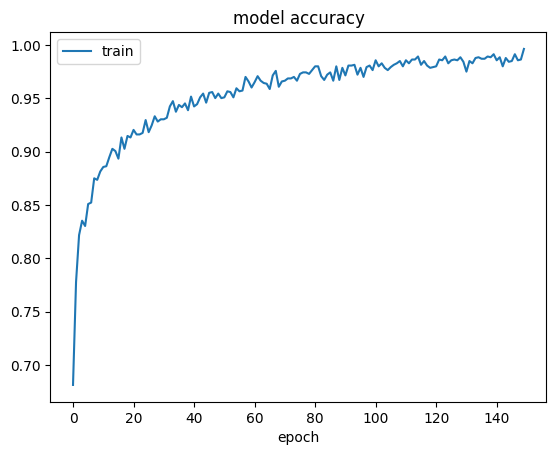

In [15]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
amcuracy=model.evaluate(train)
print(amcuracy)

44/44 [==============================] - 9s 178ms/step - loss: 0.0404 - accuracy: 0.9844
[0.04039230942726135, 0.984375]
